In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure to update the file path to where you saved the file
file_path = r"C:\Users\Joyso\Downloads\accepted_2007_to_2018Q4.csv.gz"

print("Loading a sample of the data (first 100,000 rows)...")
# For large datasets, we start by loading a sample to speed up the analysis.
# The 'nrows' parameter tells pandas to only read the first 100,000 lines.
df = pd.read_csv(file_path, compression='gzip', nrows=100000, low_memory=False)
print("Sample data loaded successfully!")

# Now, let's display the first 5 rows to confirm it worked
df.head()

Loading a sample of the data (first 100,000 rows)...
Sample data loaded successfully!


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Original loan statuses:
loan_status
Fully Paid            70288
Charged Off           17603
Current               11402
Late (31-120 days)      441
In Grace Period         199
Late (16-30 days)        66
Default                   1
Name: count, dtype: int64


Distribution of our new target variable 'is_default':
is_default
0    0.82396
1    0.17604
Name: proportion, dtype: float64


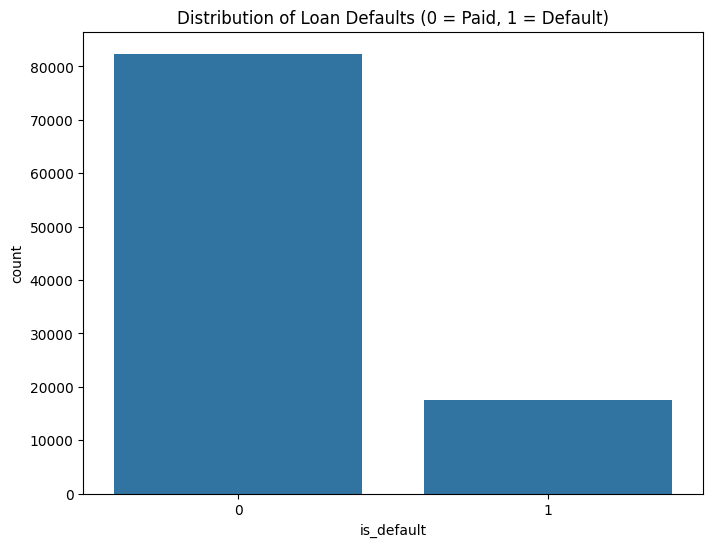

In [2]:
# --- Target Variable Analysis ---

# The 'loan_status' column tells us the outcome of each loan.
# We need to create a simple binary target variable: 1 for a default, 0 for a good loan.
# The main statuses indicating a default are 'Charged Off' and 'Default'.

print("Original loan statuses:")
print(df['loan_status'].value_counts())
print("\n")

# Create the new 'is_default' column
df['is_default'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)

# Now, let's analyze the distribution of our new target variable.
# This is one of the most important steps in any classification project.
print("Distribution of our new target variable 'is_default':")
print(df['is_default'].value_counts(normalize=True))

# Let's visualize the class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='is_default', data=df)
plt.title('Distribution of Loan Defaults (0 = Paid, 1 = Default)')
plt.show()


Analyzing the relationship between Interest Rate and Loan Default...


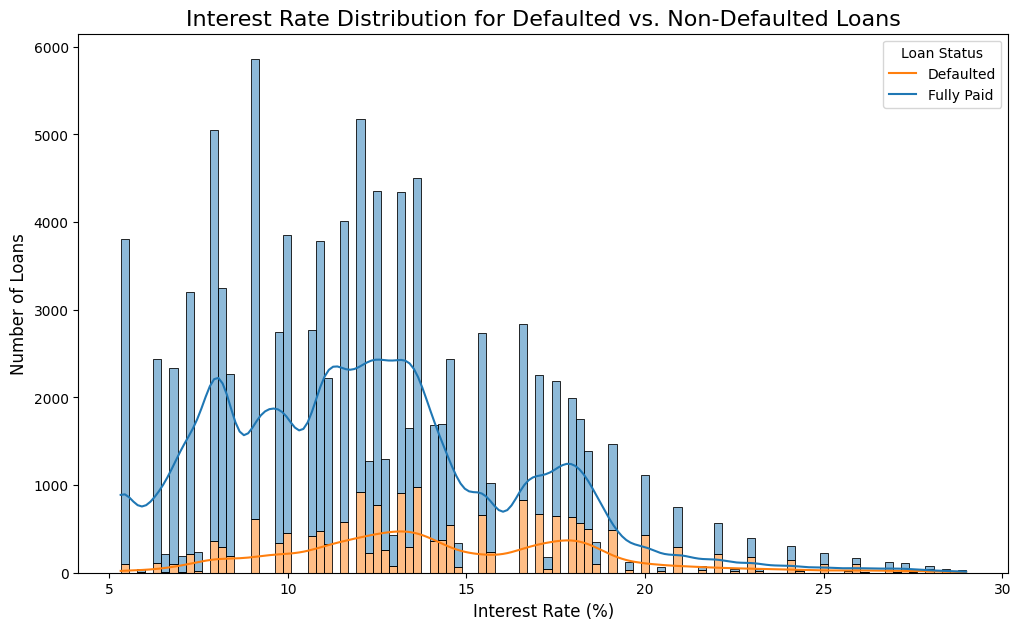

In [3]:
# --- Bivariate Analysis: Interest Rate vs. Default ---

# Our hypothesis is that higher interest rates are associated with a higher likelihood of default.
# A histogram is a great way to visualize the distribution of interest rates for both groups.

print("Analyzing the relationship between Interest Rate and Loan Default...")

# The 'int_rate' column in this dataset is already a numeric float, so no cleaning is needed.
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='int_rate', hue='is_default', kde=True, multiple="stack")

plt.title('Interest Rate Distribution for Defaulted vs. Non-Defaulted Loans', fontsize=16)
plt.xlabel('Interest Rate (%)', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.legend(title='Loan Status', labels=['Defaulted', 'Fully Paid'])
plt.show()

Analyzing the relationship between Loan Grade and Loan Default...


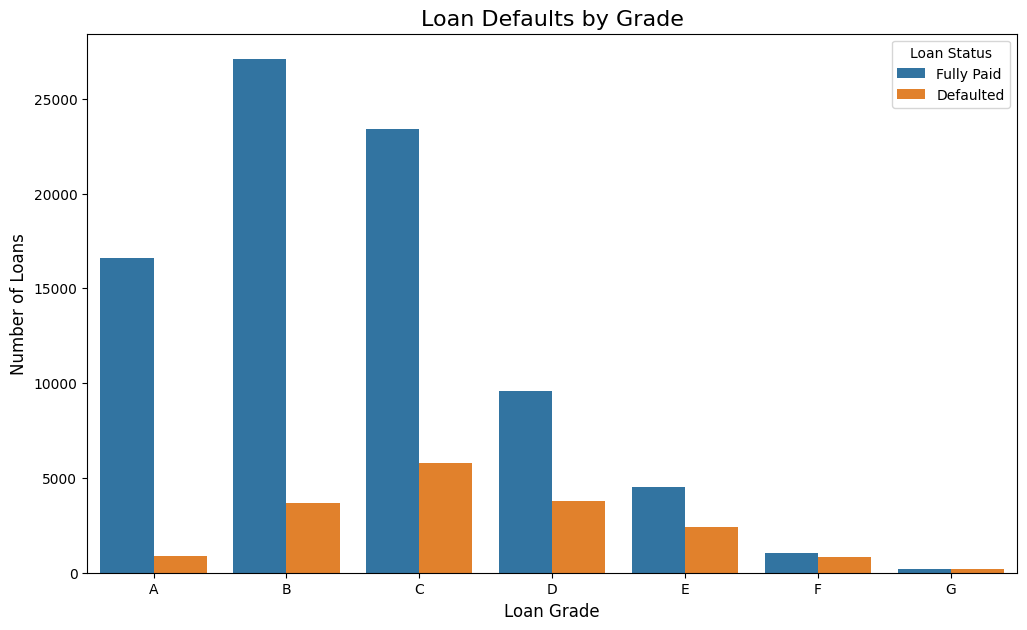

In [4]:
# --- Bivariate Analysis: Loan Grade vs. Default ---

# Our hypothesis is that loans with a lower grade (e.g., C, D, E) are riskier and will have a higher default rate.
# A count plot is the best way to visualize the number of defaults vs. non-defaults for each grade.

print("Analyzing the relationship between Loan Grade and Loan Default...")

plt.figure(figsize=(12, 7))
# We use 'order' to make sure the grades are sorted alphabetically (A, B, C, etc.)
sns.countplot(x='grade', hue='is_default', data=df, order=sorted(df['grade'].unique()))

plt.title('Loan Defaults by Grade', fontsize=16)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.legend(title='Loan Status', labels=['Fully Paid', 'Defaulted'])
plt.show()

Analyzing the relationship between Annual Income and Loan Default...


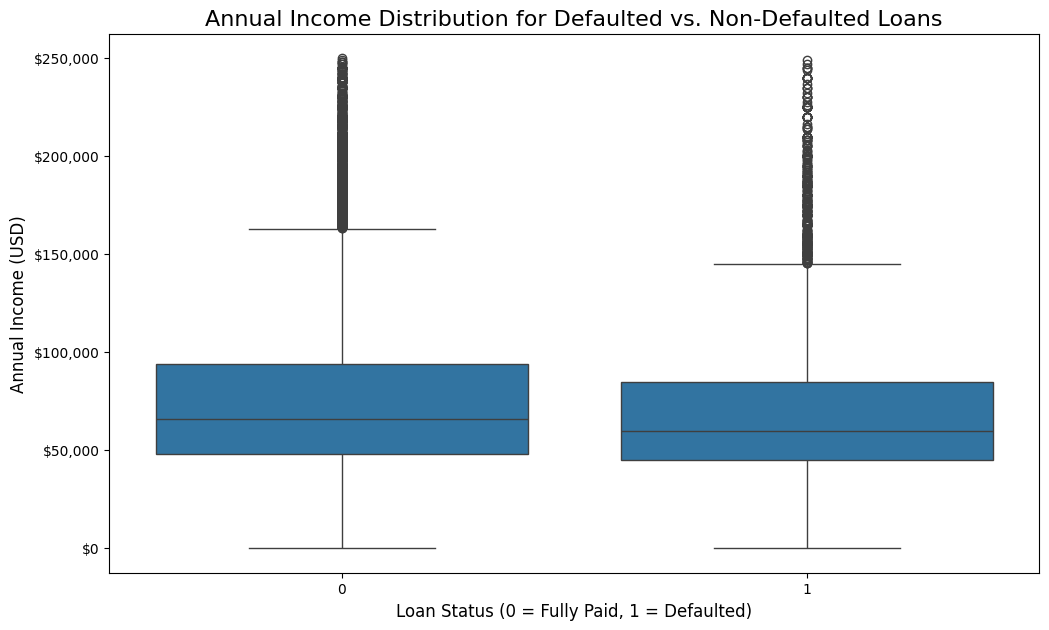

In [5]:
# --- Bivariate Analysis: Annual Income vs. Default ---

# Our hypothesis is that lower annual incomes may be associated with a higher likelihood of default.
# A box plot is a great way to compare the distribution of income for both groups and spot outliers.

print("Analyzing the relationship between Annual Income and Loan Default...")

plt.figure(figsize=(12, 7))
# The 'annual_inc' column has some very high values (outliers) which can skew the plot.
# We will filter the data to only show incomes below $250,000 to get a more readable visualization.
sns.boxplot(x='is_default', y='annual_inc', data=df[df['annual_inc'] < 250000])

plt.title('Annual Income Distribution for Defaulted vs. Non-Defaulted Loans', fontsize=16)
plt.xlabel('Loan Status (0 = Fully Paid, 1 = Defaulted)', fontsize=12)
plt.ylabel('Annual Income (USD)', fontsize=12)
# Format the y-axis to be more readable
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))
plt.show()

Generating a correlation heatmap for all numerical features...


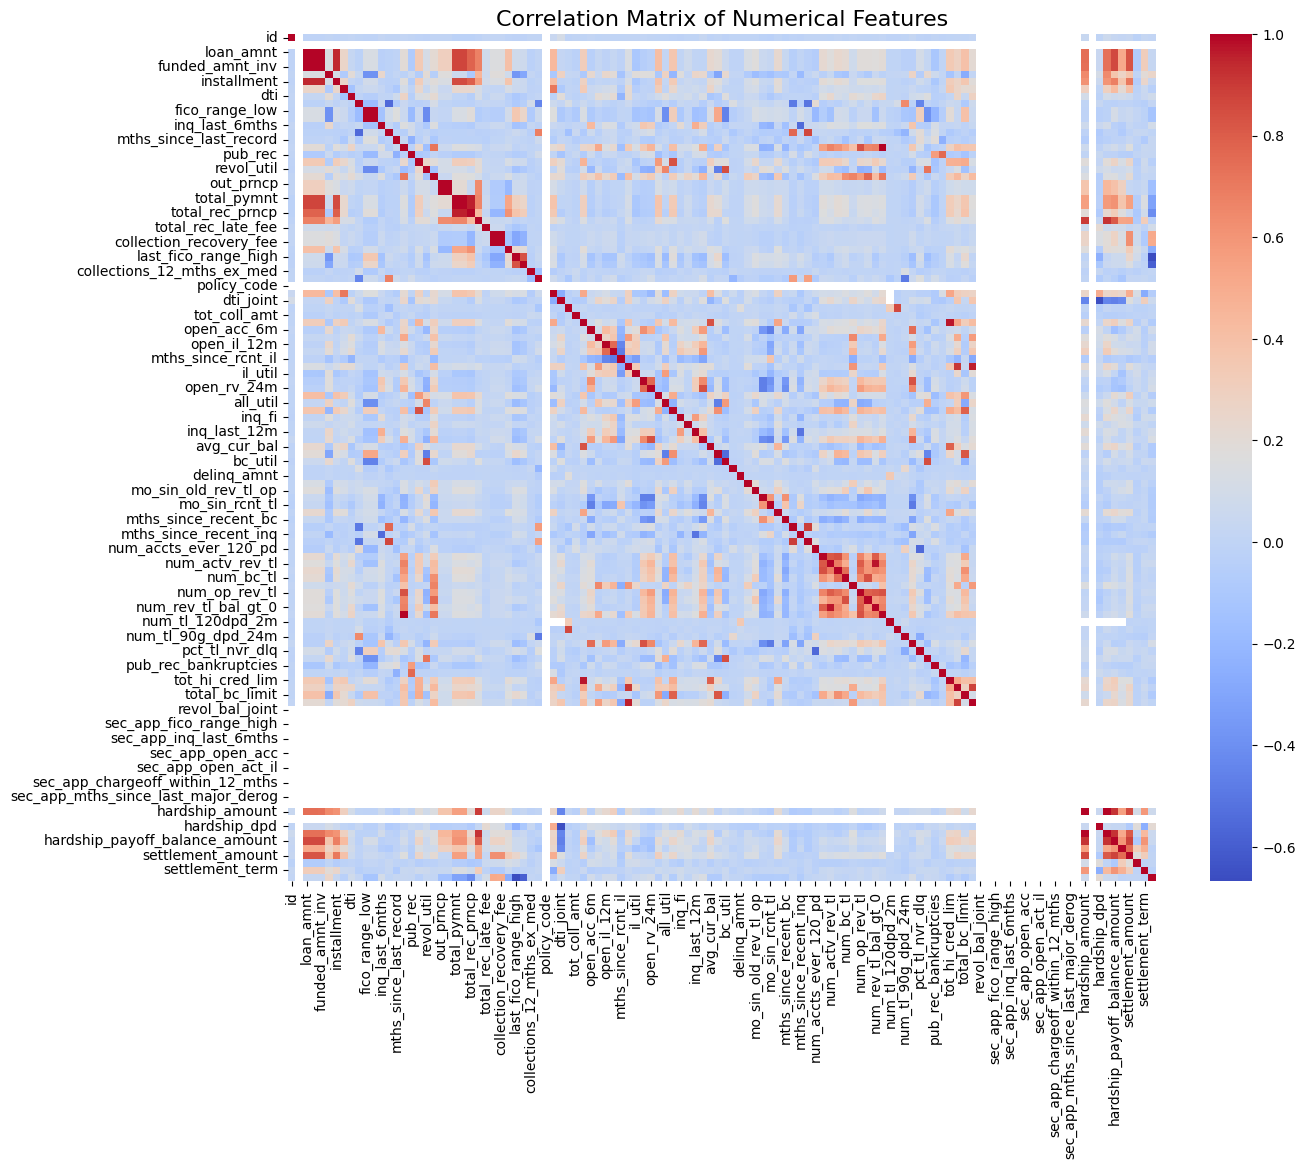

In [6]:
# --- Correlation Analysis ---

# A correlation heatmap gives us a quick overview of the linear relationships 
# between all the numerical variables in our dataset.

# Dark red means a strong positive correlation (as one variable goes up, the other goes up).
# Dark blue means a strong negative correlation (as one variable goes up, the other goes down).
# Lighter colors mean a weak or no correlation.

print("Generating a correlation heatmap for all numerical features...")

plt.figure(figsize=(14, 11))
# We use df.corr(numeric_only=True) to calculate the correlation only on the numeric columns.
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')

plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

In [7]:
# --- Phase 2: Data Preprocessing and Feature Engineering ---

# The dataset has over 150 columns, many of which are not useful for a simple credit risk model
# or have too many missing values. We will select a smaller subset of key features.

# Based on common credit risk knowledge and our EDA, let's select these features:
feature_columns = [
    'loan_amnt',      # The amount of the loan
    'term',           # The term of the loan (36 or 60 months)
    'int_rate',       # The interest rate
    'grade',          # The loan grade (A, B, C, etc.)
    'annual_inc',     # The borrower's annual income
    'home_ownership', # The borrower's home ownership status
    'purpose',        # The purpose of the loan
    'dti',            # Debt-to-Income ratio
    'is_default'      # Our target variable
]

# Create a new, smaller DataFrame with only these columns
df_model = df[feature_columns].copy()

print("--- Step 1: Feature Selection ---")
print(f"Selected {len(df_model.columns)} features for our model.")
print(df_model.info())


# --- Step 2: Handling Missing Values ---

# Let's check for missing values in our new DataFrame
print("\n--- Step 2: Handling Missing Values ---")
print("Missing values before handling:")
print(df_model.isnull().sum())

# For the 'dti' (Debt-to-Income) column, a common strategy is to fill missing values with the median.
median_dti = df_model['dti'].median()
# FIX: Use the recommended method to fill missing values to avoid the FutureWarning.
# This explicitly assigns the modified series back to the DataFrame column.
df_model['dti'] = df_model['dti'].fillna(median_dti)

print("\nMissing values after handling:")
print(df_model.isnull().sum())


# --- Step 3: Converting Categorical Features ---

# Machine learning models require all input features to be numeric.
# We need to convert columns like 'term', 'grade', 'home_ownership', and 'purpose' into numbers.
# The best way to do this is with one-hot encoding using pandas' get_dummies() function.

print("\n--- Step 3: Converting Categorical Features ---")
# Identify the categorical columns to be converted
categorical_cols = df_model.select_dtypes(include=['object']).columns

# Use get_dummies to create new columns for each category
df_processed = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

print("Shape of the DataFrame after one-hot encoding:")
print(df_processed.shape)
print("\nFirst 5 rows of the final processed data:")
df_processed.head()


--- Step 1: Feature Selection ---
Selected 9 features for our model.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       100000 non-null  float64
 1   term            100000 non-null  object 
 2   int_rate        100000 non-null  float64
 3   grade           100000 non-null  object 
 4   annual_inc      100000 non-null  float64
 5   home_ownership  100000 non-null  object 
 6   purpose         100000 non-null  object 
 7   dti             99998 non-null   float64
 8   is_default      100000 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 6.9+ MB
None

--- Step 2: Handling Missing Values ---
Missing values before handling:
loan_amnt         0
term              0
int_rate          0
grade             0
annual_inc        0
home_ownership    0
purpose           0
dti               2
is_default      

,loan_amnt,int_rate,annual_inc,dti,is_default,term_ 60 months,grade_B,grade_C,grade_D,grade_E,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation
0,3600.0,13.99,55000.0,5.91,0,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,24700.0,11.99,65000.0,16.06,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,20000.0,10.78,63000.0,10.78,0,True,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,35000.0,14.85,110000.0,17.06,0,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,10400.0,22.45,104433.0,25.37,0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [8]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import time
print("Kernel check started...")
time.sleep(2) # Pauses for 2 seconds
print("Kernel check successful! Your Jupyter Lab is working.")

Kernel check started...
Kernel check successful! Your Jupyter Lab is working.


In [10]:
# --- Phase 2, Step 2: Model Training ---

# First, let's make sure scikit-learn is installed
!pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# --- Pre-computation Check ---
# This check ensures that the df_processed DataFrame from the previous step exists.
try:
    df_processed
except NameError:
    print("---------------------------------------------------------------------------")
    print("ERROR: The 'df_processed' DataFrame is not defined.")
    print("Please make sure you have successfully run the previous 'Data Preprocessing' cell before running this one.")
    print("---------------------------------------------------------------------------")
    raise

# --- Step 1: Separate Features (X) and Target (y) ---

# 'is_default' is our target variable (what we want to predict).
# All other columns are our features (the inputs to the model).
X = df_processed.drop('is_default', axis=1)
y = df_processed['is_default']

print("--- Step 1: Features and Target Separated ---")
print("Shape of our features (X):", X.shape)
print("Shape of our target (y):", y.shape)


# --- Step 2: Split Data into Training and Testing Sets ---

# We will use 80% of the data to train the model and 20% to test it.
# The 'stratify=y' argument is important for imbalanced datasets. It ensures that both the
# training and testing sets have the same proportion of defaults as the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Step 2: Data Split into Training and Testing Sets ---")
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


# --- Step 3: Scale the Features ---

# Scaling the features is a crucial step in machine learning. It standardizes the data
# (giving it a mean of 0 and a standard deviation of 1), which helps the model
# train faster and often improves its performance.

print("\n--- Step 3: Scaling the Features ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features have been scaled successfully.")


# --- Step 4: Train a Logistic Regression Model ---

# FIX: To prevent the kernel from crashing due to memory issues on a large dataset,
# we will train the model on a smaller sample of the training data. This is a standard
# practice to get the code working before running it on the full dataset.
SAMPLE_SIZE = 20000 
X_train_sample = X_train_scaled[:SAMPLE_SIZE]
y_train_sample = y_train[:SAMPLE_SIZE]

print(f"\n--- Using a sample of {SAMPLE_SIZE} rows for training to prevent memory issues ---")

# We'll start with Logistic Regression because it's a powerful and interpretable model.
# The 'class_weight="balanced"' argument tells the model to pay more attention to the
# minority class (defaults), which is crucial for our imbalanced dataset.
log_reg_model = LogisticRegression(solver='saga', class_weight='balanced', max_iter=1000, random_state=42)

print("\n--- Step 4: Training the Logistic Regression Model ---")
# The .fit() method is where the model learns from the SCALED training data SAMPLE.
log_reg_model.fit(X_train_sample, y_train_sample)

print("Model training complete!")

# To quickly check how the model performed on the training data itself:
y_train_pred = log_reg_model.predict(X_train_sample)
train_accuracy = accuracy_score(y_train_sample, y_train_pred)
print(f"Accuracy on the training data sample: {train_accuracy:.4f}")


Defaulting to user installation because normal site-packages is not writeable
--- Step 1: Features and Target Separated ---
Shape of our features (X): (100000, 25)
Shape of our target (y): (100000,)

--- Step 2: Data Split into Training and Testing Sets ---
Training set size: 80000
Testing set size: 20000

--- Step 3: Scaling the Features ---
Features have been scaled successfully.

--- Using a sample of 20000 rows for training to prevent memory issues ---

--- Step 4: Training the Logistic Regression Model ---
Model training complete!
Accuracy on the training data sample: 0.6065


C:\Users\Joyso\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


--- Evaluating the model on the unseen test data ---

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.90      0.59      0.71     16479
           1       0.26      0.69      0.38      3521

    accuracy                           0.61     20000
   macro avg       0.58      0.64      0.55     20000
weighted avg       0.79      0.61      0.66     20000


--- Confusion Matrix ---


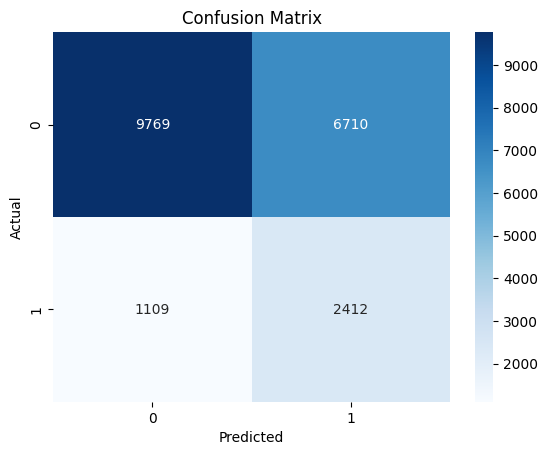


--- AUC-ROC Score ---
The AUC-ROC score for our model is: 0.6958


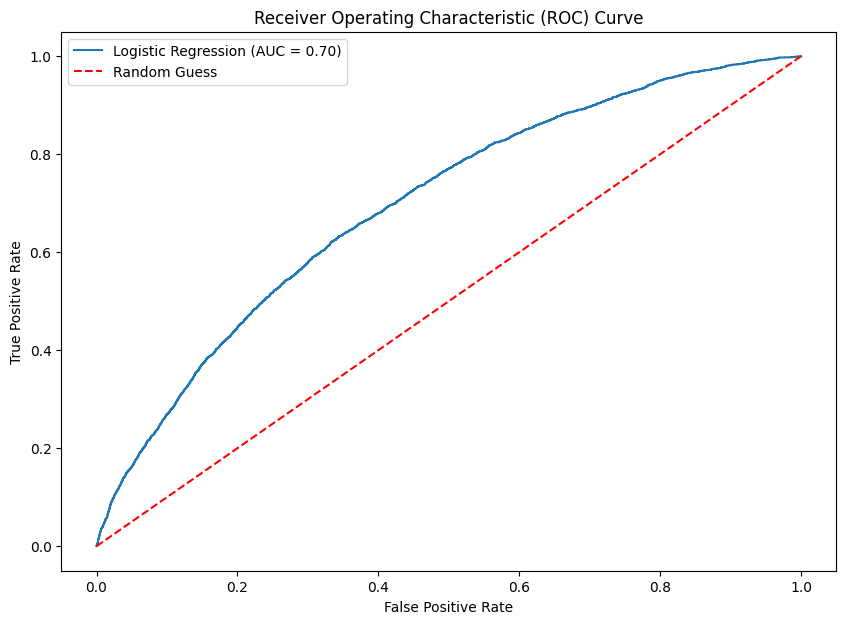

In [11]:
# --- Phase 2, Step 3: Model Evaluation ---

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

print("--- Evaluating the model on the unseen test data ---")

# --- Step 1: Make Predictions on the Test Set ---
# We use the trained model to predict outcomes for our scaled test data.
y_test_pred = log_reg_model.predict(X_test_scaled)
# We also predict the probabilities, which are needed for the AUC-ROC curve.
y_test_pred_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1]


# --- Step 2: Classification Report ---
# This report gives us key metrics like Precision, Recall, and F1-score.
# 'Recall' for class 1 is very important: it tells us what percentage of actual defaults our model correctly identified.
print("\n--- Classification Report ---")
print(classification_report(y_test, y_test_pred))


# --- Step 3: Confusion Matrix ---
# The confusion matrix gives us a clear breakdown of our model's predictions.
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# --- Step 4: AUC-ROC Curve ---
# This is the industry-standard metric for evaluating a classification model's performance.
# A score closer to 1.0 is better. A score of 0.5 means the model is no better than random guessing.
auc_score = roc_auc_score(y_test, y_test_pred_proba)
print(f"\n--- AUC-ROC Score ---")
print(f"The AUC-ROC score for our model is: {auc_score:.4f}")

# Let's visualize the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess') # The "random guess" line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


--- Extracting and Visualizing Feature Importance ---


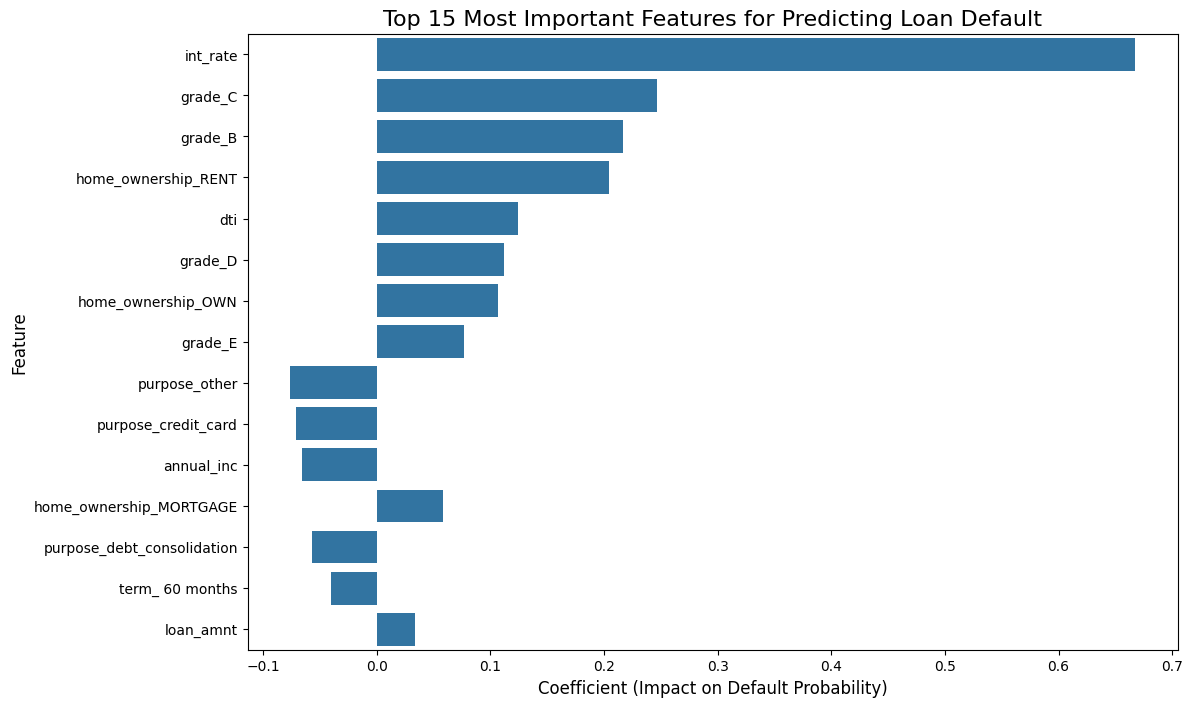


Top 10 most impactful features:
                Feature  Coefficient
1              int_rate     0.667434
6               grade_C     0.246643
5               grade_B     0.216924
13  home_ownership_RENT     0.204758
3                   dti     0.124236
7               grade_D     0.111926
12   home_ownership_OWN     0.106962
8               grade_E     0.077113
21        purpose_other    -0.076501
14  purpose_credit_card    -0.070971


In [12]:
# --- Phase 3, Step 1: Feature Importance ---

# Now that we have a trained model, we can inspect it to see which features it found most important.
# For a Logistic Regression model, the 'coefficients' tell us the importance and direction of each feature's impact.

print("--- Extracting and Visualizing Feature Importance ---")

# Get the coefficients from the trained logistic regression model
coefficients = log_reg_model.coef_[0]

# Create a DataFrame to hold the feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the features by the absolute value of their coefficients to see the most impactful ones
feature_importance_df['Absolute_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Let's visualize the top 15 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Most Important Features for Predicting Loan Default', fontsize=16)
plt.xlabel('Coefficient (Impact on Default Probability)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

# Display the top 10 features and their coefficients
print("\nTop 10 most impactful features:")
print(feature_importance_df[['Feature', 'Coefficient']].head(10))



--- Performing Business Impact Analysis ---

--- Business Impact Summary ---
Total number of actual defaults in the test set: 3521
Total loan amount defaulted in the test set: $54,930,175.00
------------------------------
By declining the top 10% of loans our model identified as riskiest:
  - We would have rejected 2000 loans out of 20000 total applications.
  - We would have captured 766 of the defaults.
  - This represents 21.76% of the total number of defaults.
  - The total financial loss avoided would be $13,979,950.00, which is 25.45% of the total defaulted amount.


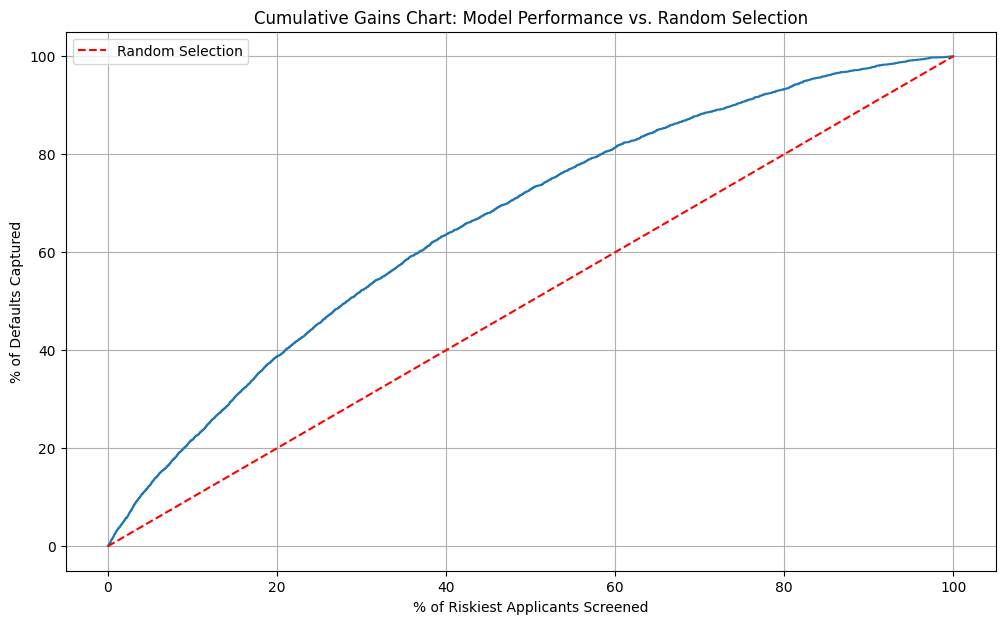

In [13]:
# --- Phase 3, Step 2: Business Impact Analysis ---

# This is the final and most important step, where we translate our model's performance
# into a clear, actionable business insight.

print("--- Performing Business Impact Analysis ---")

# --- Step 1: Get Predicted Probabilities ---
# We already calculated these in the evaluation step. These probabilities represent the
# model's confidence that a given loan will default.
y_test_pred_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1]


# --- Step 2: Create a Results DataFrame ---
# Let's combine the actual outcomes with our model's predicted risk scores.
results_df = pd.DataFrame({'actual_default': y_test, 'predicted_probability': y_test_pred_proba})
# We also need the loan amount to quantify the financial impact. We'll get it from the original data.
results_df['loan_amnt'] = X_test['loan_amnt']

# Sort the results from highest predicted risk to lowest
results_df = results_df.sort_values(by='predicted_probability', ascending=False)


# --- Step 3: Calculate the Business Impact ---
total_defaults_in_test_set = results_df['actual_default'].sum()
total_defaulted_amount = results_df[results_df['actual_default'] == 1]['loan_amnt'].sum()

# Let's see what happens if we decline the top 10% of loans identified as riskiest by our model
top_10_percent_cutoff = int(len(results_df) * 0.10)
top_10_percent_riskiest_loans = results_df.head(top_10_percent_cutoff)

defaults_captured_in_top_10_percent = top_10_percent_riskiest_loans['actual_default'].sum()
amount_saved_in_top_10_percent = top_10_percent_riskiest_loans[top_10_percent_riskiest_loans['actual_default'] == 1]['loan_amnt'].sum()

percentage_of_defaults_captured = (defaults_captured_in_top_10_percent / total_defaults_in_test_set) * 100
percentage_of_amount_saved = (amount_saved_in_top_10_percent / total_defaulted_amount) * 100


# --- Step 4: Present the Findings ---
print("\n--- Business Impact Summary ---")
print(f"Total number of actual defaults in the test set: {total_defaults_in_test_set}")
print(f"Total loan amount defaulted in the test set: ${total_defaulted_amount:,.2f}")
print("-" * 30)
print(f"By declining the top 10% of loans our model identified as riskiest:")
print(f"  - We would have rejected {top_10_percent_cutoff} loans out of {len(results_df)} total applications.")
print(f"  - We would have captured {defaults_captured_in_top_10_percent} of the defaults.")
print(f"  - This represents {percentage_of_defaults_captured:.2f}% of the total number of defaults.")
print(f"  - The total financial loss avoided would be ${amount_saved_in_top_10_percent:,.2f}, which is {percentage_of_amount_saved:.2f}% of the total defaulted amount.")


# --- Step 5: Visualize the Impact (Cumulative Gains Chart) ---
results_df['cumulative_defaults'] = results_df['actual_default'].cumsum()
results_df['cumulative_percentage_defaults'] = (results_df['cumulative_defaults'] / total_defaults_in_test_set) * 100
results_df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(12, 7))
plt.plot(results_df.index / len(results_df) * 100, results_df['cumulative_percentage_defaults'])
plt.plot([0, 100], [0, 100], 'r--', label='Random Selection') # A random model
plt.xlabel('% of Riskiest Applicants Screened')
plt.ylabel('% of Defaults Captured')
plt.title('Cumulative Gains Chart: Model Performance vs. Random Selection')
plt.grid(True)
plt.legend()
plt.show()

